In [6]:
import  os
import  sys
import  xarray  as  xr
import  matplotlib.pyplot  as plt
import cartopy.crs as ccrs
import netCDF4
import numpy as np
import glob
import dask.array as da
from copy import deepcopy
import cmocean

import cftime # for working with netcdf time 

In [36]:
data_dir = '/Users/ragen/AREDI/ACDC/ISCA/half_ocean_newbucket_0qflux_control'
globname = data_dir + '/*/*.nc'
file_list = glob.glob(globname)
file_list.sort()
ds_ctrl = xr.open_mfdataset(file_list,autoclose='true')

lat = ds_ctrl['lat'].values[:]
lon = ds_ctrl['lon'].values[:]
press = ds_ctrl['pfull'].values[:]

with xr.set_options(enable_cftimeindex=True):
    ds_ctrl = xr.open_mfdataset(file_list,autoclose='true',decode_times=False)

time0 = ds_ctrl['time']
# time2 = nc.num2date(ds_ctrl['time'][:], units=ds_ctrl['time'].units,
#                             calendar=ds_ctrl['time'].calendar,only_use_cftime_datetimes=True)

time2 = cftime.num2date(ds_ctrl['time'][:], units=ds_ctrl['time'].units,
                            calendar=ds_ctrl['time'].calendar,only_use_cftime_datetimes=True)

ds_ctrl['time'].values = time2

# Drop everything before the 9th year
ds_ctrl = ds_ctrl.where(ds_ctrl['time'].dt.year.isin(range(9,11)),drop=True)
# ds_ctrl = ds_ctrl_long.loc[dict(time=slice(time2[60],time2[72]))] #temporary times!!!

data_dir = '/Users/ragen/AREDI/ACDC/ISCA/half_ocean_newbucket_0qflux_same_albedo_control'
globname = data_dir + '/*/*.nc'
file_list = glob.glob(globname)
file_list.sort()
ds_albedo = xr.open_mfdataset(file_list,autoclose='true')

lat = ds_albedo['lat'].values[:]
lon = ds_albedo['lon'].values[:]
press = ds_albedo['pfull'].values[:]

with xr.set_options(enable_cftimeindex=True):
    ds_ctrl = xr.open_mfdataset(file_list,autoclose='true',decode_times=False)

time0 = ds_albedo['time']
# time2 = nc.num2date(ds_ctrl['time'][:], units=ds_ctrl['time'].units,
#                             calendar=ds_ctrl['time'].calendar,only_use_cftime_datetimes=True)

time2 = cftime.num2date(ds_albedo['time'][:], units=ds_albedo['time'].units,
                            calendar=ds_albedo['time'].calendar,only_use_cftime_datetimes=True)

ds_ctrl['time'].values = time2

# Drop everything before the 9th year
ds_albedo = ds_albedo.where(ds_albedo['time'].dt.year.isin(range(9,11)),drop=True)

/anaconda3/lib/python3.5/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/anaconda3/lib/python3.5/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


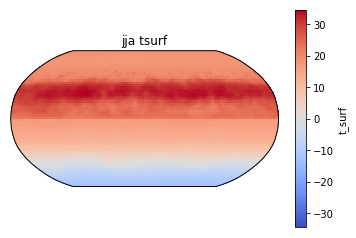

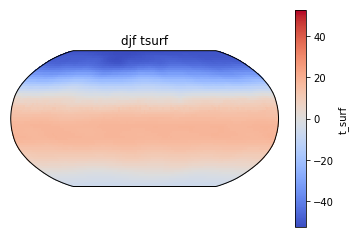

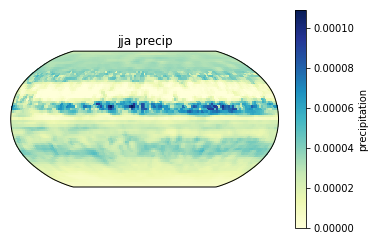

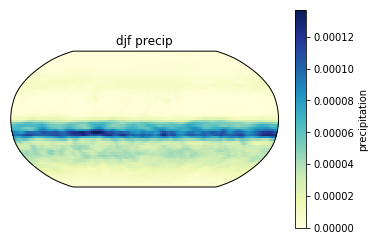

In [37]:
ds_clim = ds_ctrl.groupby('time.month').mean('time')

tsurf_jja = dict(ds_ctrl['t_surf'].groupby('time.season'))['JJA'].mean('time') - 273.15
tsurf_djf = dict(ds_ctrl['t_surf'].groupby('time.season'))['DJF'].mean('time') - 273.15

precip_jja = dict(ds_ctrl['precipitation'].groupby('time.season'))['JJA'].mean('time')
precip_djf = dict(ds_ctrl['precipitation'].groupby('time.season'))['DJF'].mean('time')

ax = plt.axes(projection=ccrs.Robinson())
tsurf_jja.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.set_global()
plt.title('jja tsurf')
plt.show()

ax = plt.axes(projection=ccrs.Robinson())
tsurf_djf.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.set_global()
plt.title('djf tsurf')
plt.show()

from palettable.colorbrewer.sequential import YlGnBu_9

ax = plt.axes(projection=ccrs.Robinson())
precip_jja.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=YlGnBu_9.mpl_colormap)
ax.set_global()
plt.title('jja precip')
plt.show()

ax = plt.axes(projection=ccrs.Robinson())
precip_djf.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=YlGnBu_9.mpl_colormap)
ax.set_global()
plt.title('djf precip')
plt.show()

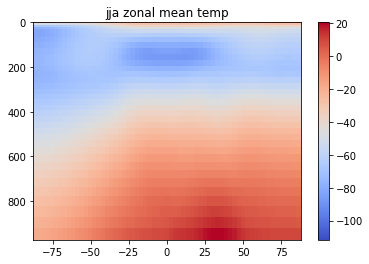

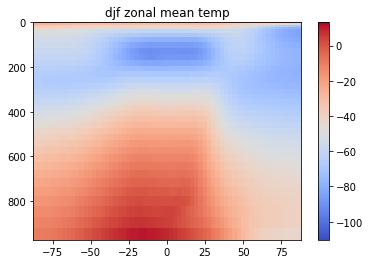

In [38]:
temp_jja = dict(ds_ctrl['temp'].groupby('time.season'))['JJA'].mean('time') - 273.15
temp_djf = dict(ds_ctrl['temp'].groupby('time.season'))['DJF'].mean('time') - 273.15

plt.pcolormesh(lat, press, temp_jja.mean('lon'), cmap='coolwarm')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('jja zonal mean temp')
plt.show()

plt.pcolormesh(lat, press, temp_djf.mean('lon'), cmap='coolwarm')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('djf zonal mean temp')
plt.show()

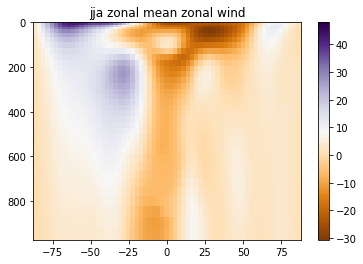

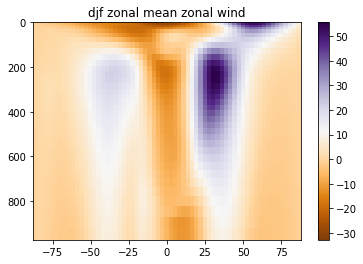

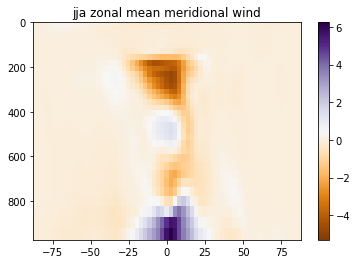

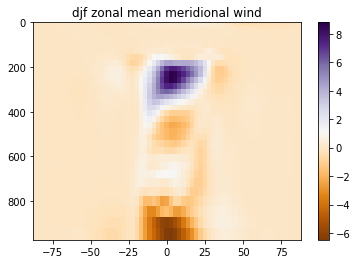

In [77]:
from palettable.colorbrewer.diverging import PuOr_11

ucomp_jja = dict(ds_ctrl['ucomp'].groupby('time.season'))['JJA'].mean('time') 
ucomp_djf = dict(ds_ctrl['ucomp'].groupby('time.season'))['DJF'].mean('time') 

plt.pcolormesh(lat, press, ucomp_jja.mean('lon'), cmap=PuOr_11.mpl_colormap)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('jja zonal mean zonal wind')
plt.show()

plt.pcolormesh(lat, press, ucomp_djf.mean('lon'), cmap=PuOr_11.mpl_colormap)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('djf zonal mean zonal wind')
plt.show()

vcomp_jja = dict(ds_ctrl['vcomp'].groupby('time.season'))['JJA'].mean('time') 
vcomp_djf = dict(ds_ctrl['vcomp'].groupby('time.season'))['DJF'].mean('time') 

plt.pcolormesh(lat, press, vcomp_jja.mean('lon'), cmap=PuOr_11.mpl_colormap)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('jja zonal mean meridional wind')
plt.show()

plt.pcolormesh(lat, press, vcomp_djf.mean('lon'), cmap=PuOr_11.mpl_colormap)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('djf zonal mean meridional wind')
plt.show()

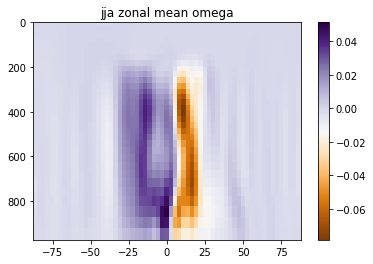

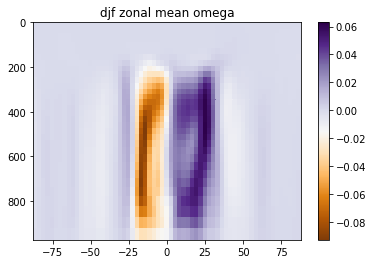

In [132]:
omega_jja = dict(ds_ctrl['omega'].groupby('time.season'))['JJA'].mean('time') 
omega_djf = dict(ds_ctrl['omega'].groupby('time.season'))['DJF'].mean('time') 

plt.pcolormesh(lat, press, omega_jja.mean('lon'), cmap=PuOr_11.mpl_colormap)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('jja zonal mean omega')
plt.show()

plt.pcolormesh(lat, press, omega_djf.mean('lon'), cmap=PuOr_11.mpl_colormap)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('djf zonal mean omega')
plt.show()

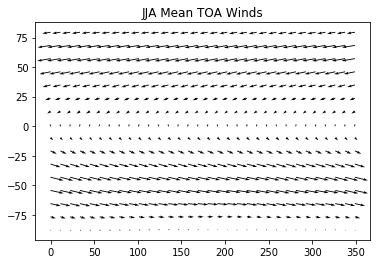

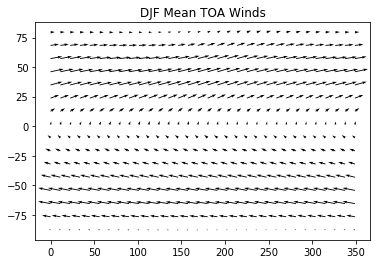

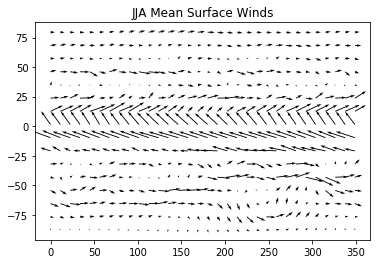

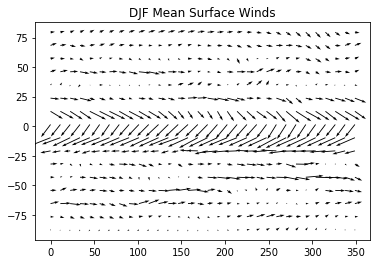

In [126]:
plt.quiver(lon[::4], lat[::4], ucomp_jja[0,::4,::4], vcomp_jja[0,::4,::4])
plt.title('JJA Mean TOA Winds')
plt.show()

plt.quiver(lon[::4], lat[::4], ucomp_djf[0,::4,::4], vcomp_djf[0,::4,::4])
plt.title('DJF Mean TOA Winds')
plt.show()

plt.quiver(lon[::4], lat[::4], ucomp_jja[-1,::4,::4], vcomp_jja[-1,::4,::4])
plt.title('JJA Mean Surface Winds')
plt.show()

plt.quiver(lon[::4], lat[::4], ucomp_jja[-1,::4,::4], vcomp_djf[-1,::4,::4])
plt.title('DJF Mean Surface Winds')
plt.show()

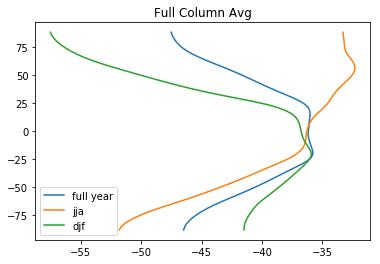

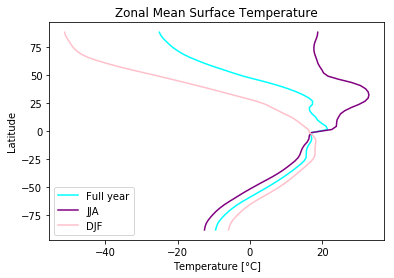

In [147]:
temp_clim = ds_ctrl['temp'].mean('time') - 273.15
tmp_clim = temp_clim.mean('pfull')
tmp_jja = temp_jja.mean('pfull')
tmp_djf = temp_djf.mean('pfull')

plt.plot(tmp_clim.mean('lon').T, lat)
plt.plot(tmp_jja.mean('lon').T, lat)
plt.plot(tmp_djf.mean('lon').T, lat)
plt.title('Full Column Avg')
plt.legend(('full year', 'jja', 'djf'))
plt.show()



tsurf_clim = ds_ctrl['t_surf'].mean('time') - 273.15

fig, ax = plt.subplots()
plt.plot(tsurf_clim.mean('lon').T, lat, color='cyan')
plt.plot(tsurf_jja.mean('lon').T, lat, color='purple')
plt.plot(tsurf_djf.mean('lon').T, lat, color='pink')
plt.title('Zonal Mean Surface Temperature'), plt.xlabel('Temperature [\xb0C]'), plt.ylabel('Latitude')
plt.legend(('Full year', 'JJA', 'DJF'))
plt.show()
fig.savefig('/Users/ragen/AREDI/ACDC/ISCA/tsurf_zonalmean', format='png', bbox_inches='tight')


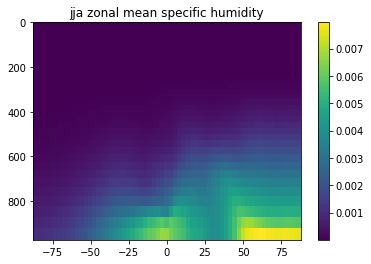

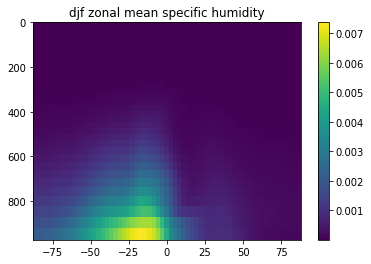

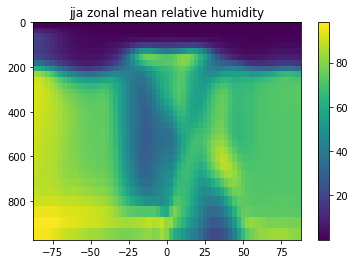

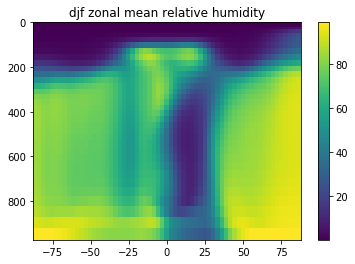

In [133]:
sphum_jja = dict(ds_ctrl['sphum'].groupby('time.season'))['JJA'].mean('time')
sphum_djf = dict(ds_ctrl['sphum'].groupby('time.season'))['DJF'].mean('time')

plt.pcolormesh(lat, press, sphum_jja.mean('lon'))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('jja zonal mean specific humidity')
plt.show()

plt.pcolormesh(lat, press, sphum_djf.mean('lon'))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('djf zonal mean specific humidity')
plt.show()

rh_jja = dict(ds_ctrl['rh'].groupby('time.season'))['JJA'].mean('time')
rh_djf = dict(ds_ctrl['rh'].groupby('time.season'))['DJF'].mean('time')

plt.pcolormesh(lat, press, rh_jja.mean('lon'))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('jja zonal mean relative humidity')
plt.show()

plt.pcolormesh(lat, press, rh_djf.mean('lon'))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('djf zonal mean relative humidity')
plt.show()

In [128]:
ds_ctrl


<xarray.Dataset>
Dimensions:            (lat: 64, latb: 65, lon: 128, lonb: 129, nv: 2, pfull: 40, phalf: 41, time: 21)
Coordinates:
  * lon                (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * lonb               (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 ...
  * lat                (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 ...
  * latb               (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 ...
  * nv                 (nv) float64 1.0 2.0
  * phalf              (phalf) float64 0.0 0.07368 0.2651 0.7976 2.052 4.604 ...
  * pfull              (pfull) float64 0.0271 0.1596 0.5078 1.377 3.244 ...
  * time               (time) object 0009-01-16 00:00:00 0009-02-16 00:00:00 ...
Data variables:
    ps                 (time, lat, lon) float32 dask.array<shape=(21, 64, 128), chunksize=(1, 64, 128)>
    bk                 (time, phalf) float32 dask.array<shape=(21, 41), chunksize=(1, 41)>
    pk                 (time, phalf) float32 dask.array<shape=(

TypeError: 'method' object is not subscriptable